# FFT Basics: Convolution

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

from numpy.random import normal as nrand

from scipy import signal
from scipy.fft import fft, ifft, fftshift

In [2]:
def plot(f, titles=None):
    fig, ax = plt.subplots(1, len(f), figsize=(12,3))
    
    for i in np.arange(0, len(f)):
        N = len(f[i])
        ax[i].plot(f[i])
        ax[i].grid()
        ax[i].set_xticks(np.arange(0,N+1,N/4))
        if titles != None:
            ax[i].set_title(titles[i])               
    
    fig.tight_layout()

In [3]:
def gaussian(sigma):
    K = np.int32(np.ceil(4*sigma))
    
    h = signal.windows.gaussian(2*K+1, sigma)
    h /= np.sum(h)
    
    return h

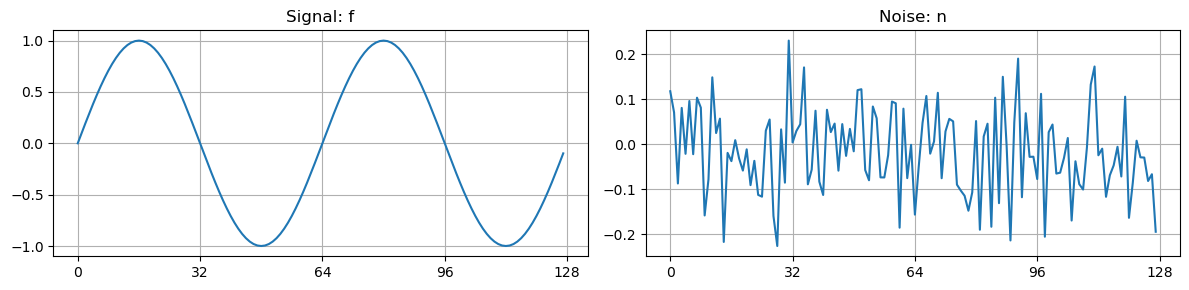

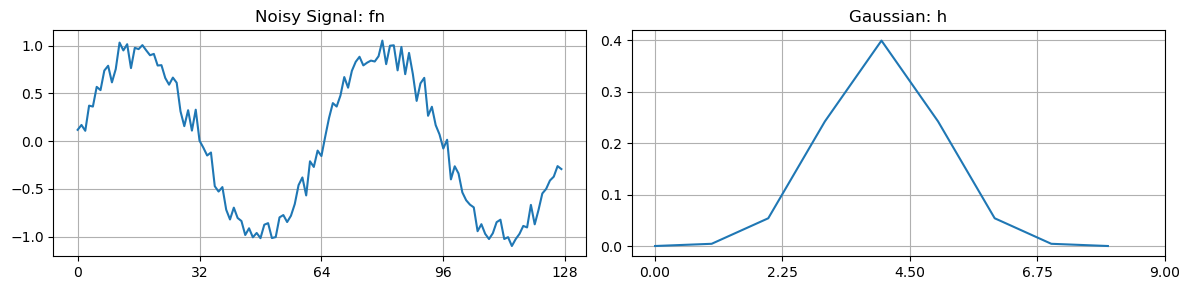

In [7]:
N = 128

x = np.arange(0, N)
f = np.sin(2*np.pi*(2*x/N))
n = 0.1*nrand(0,1,N)
fn = f + n

h = gaussian(sigma=1.0)

plot([f, n], ['Signal: f','Noise: n'])
plot([fn, h], ['Noisy Signal: fn','Gaussian: h'])

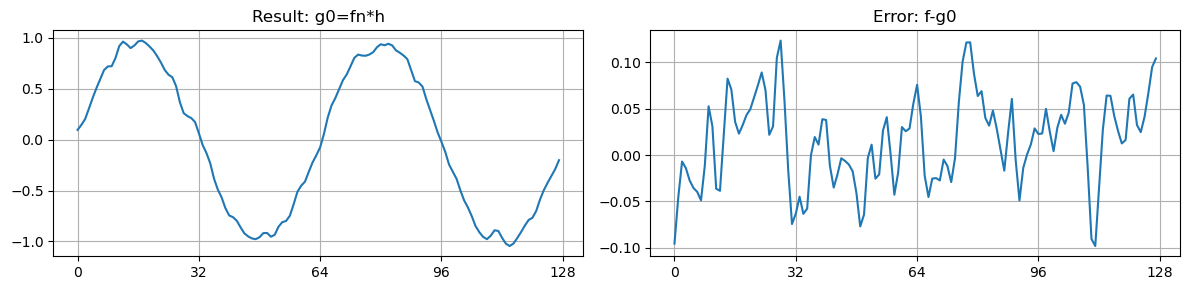

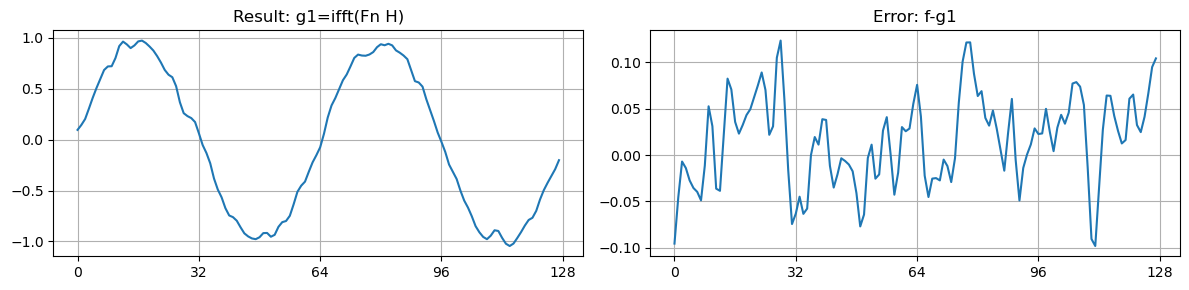

In [8]:
g0 = signal.convolve(fn, h, mode='same')
plot([g0, f-g0], ['Result: g0=fn*h','Error: f-g0'])

g1 = signal.fftconvolve(fn, h, mode='same')
plot([g1, f-g1], ['Result: g1=ifft(Fn H)','Error: f-g1'])

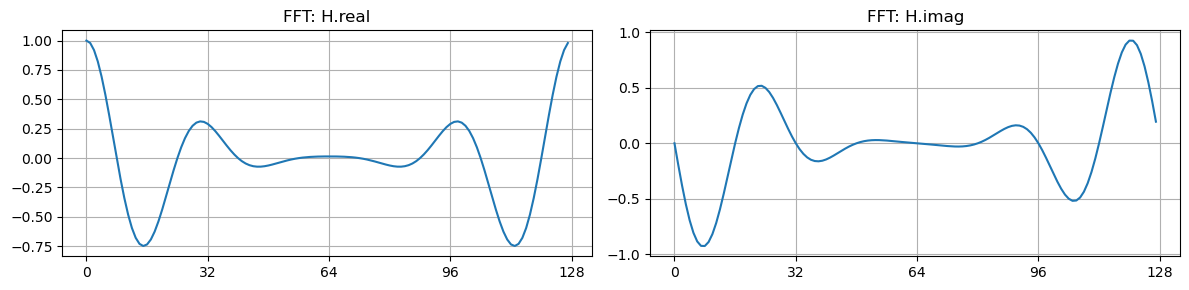

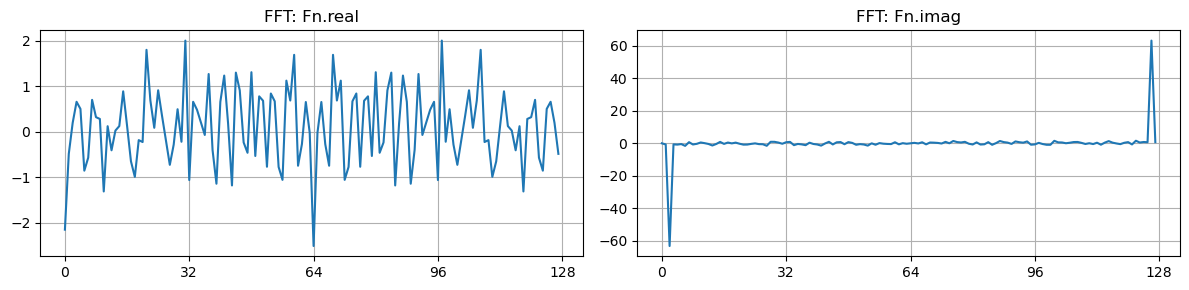

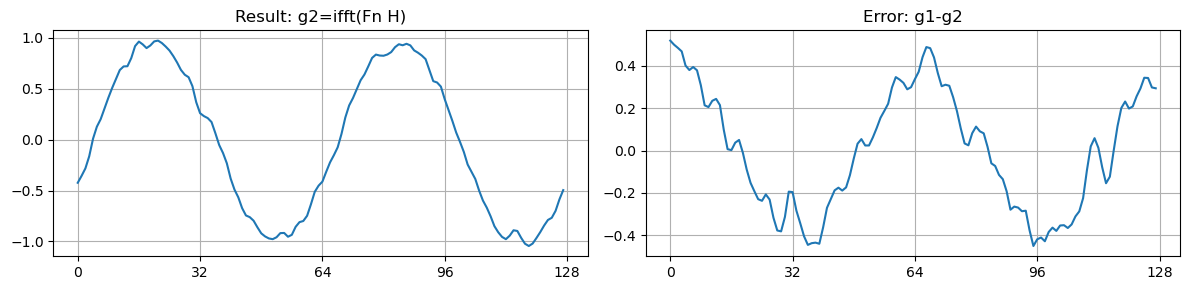

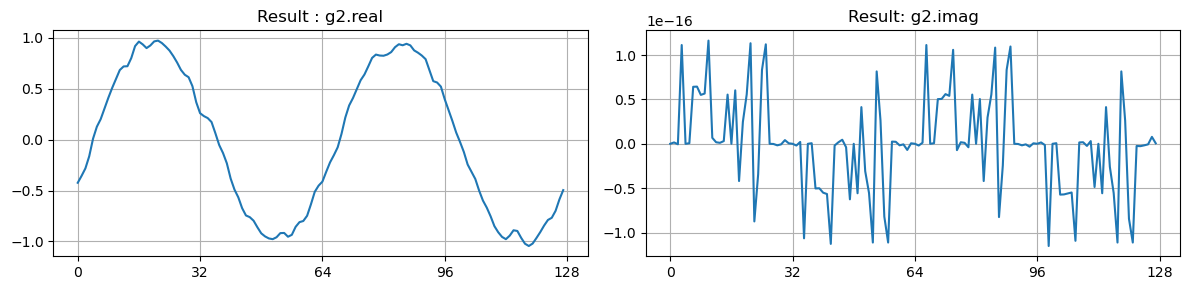

In [10]:
H = fft(h, n=N)
Fn = fft(fn, n=N)

G2 = H*Fn
g2 = ifft(G2)

if N < len(H):
    K = len(h)//2
    g2 = g2[0:N]

plot([np.real(H), np.imag(H)], ['FFT: H.real','FFT: H.imag'])
plot([np.real(Fn), np.imag(Fn)], ['FFT: Fn.real','FFT: Fn.imag'])
plot([np.real(g2), g1-np.real(g2)], ['Result: g2=ifft(Fn H)','Error: g1-g2'])
plot([np.real(g2), np.imag(g2)], ['Result : g2.real','Result: g2.imag'])
